# **Project 01 - Color Compression**

# **Thông Tin Sinh Viên**

- Họ và tên: Dương Quang Thắng
- MSSV: 22127384
- Lớp: 22CLC09

# **Import libraries**

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

# **Image preparation and processing**

In [10]:
# Read image 
def read_img(img_path):
    img = Image.open(img_path)
    
    # Convert image to NumPy array
    img_2d = np.array(img)
    
    return img_2d

# Show original image 
def show_img(img_2d):
    plt.figure(figsize=(10, 6))
    plt.imshow(img_2d)
    plt.axis('off')
    plt.show()
    

# Flatten image (height, width, channels) -> (height x width, channels)
def convert_img_to_1d(img_2d):
    img_1d = img_2d.reshape((img_2d.shape[0]*img_2d.shape[1], img_2d.shape[2]))
    return img_1d

# **Implement K-means clustering**

In [11]:
# Initialize centroids
def kmeans_init_centroids(img_1d, k_clusters, init_method='random'):
    if init_method == 'random':
        min_value = np.min(img_1d, axis=0)
        max_value = np.max(img_1d, axis=0)
        centroids = np.random.uniform(min_value, max_value, size=(k_clusters, img_1d.shape[1]))
    elif init_method == 'in_pixels':
        index = np.random.choice(img_1d.shape[0], size=k_clusters, replace=False)
        centroids = img_1d[index]
    
    return centroids


# Compute Euclidean distance
def euclidean_distance(img_1d, centroids):
    distances = np.sqrt(np.sum((img_1d[:, np.newaxis] - centroids) ** 2, axis=-1))
    return distances


# Assign labels
def kmeans_asign_labels(img_1d, centroids):
    distance_np = euclidean_distance(img_1d, centroids)
    labels = np.argmin(distance_np, axis=1)
    return labels


# Update centroids
def kmeans_update_centroids(img_1d, labels, k_clusters):
    centroids = np.zeros((k_clusters, img_1d.shape[1]))
    
    for k in range(k_clusters):
        # Collect all points assigned to the k-th cluster
        cluster_points = img_1d[labels == k, :]
        
        if cluster_points.size == 0:
            centroids[k] = img_1d[np.random.choice(img_1d.shape[0])]
        else:
            # Take average
            centroids[k, :] = np.mean(cluster_points, axis=0)
        
    return centroids


# Check convergence
def has_converged(centroids, new_centroids, tol=1e-4):
    return np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tol)


# K-means clustering 
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    centroids = kmeans_init_centroids(img_1d, k_clusters, init_centroids)
    
    for i in range(max_iter):
        labels = kmeans_asign_labels(img_1d, centroids)
        
        new_centroids = kmeans_update_centroids(img_1d, labels, k_clusters)
        
        if has_converged(new_centroids, centroids, tol=1e-4):
            break
        
        centroids = new_centroids
        
    final_labels = kmeans_asign_labels(img_1d, centroids)
    
    return centroids, final_labels

# **Generate image 2D**

In [12]:
def generate_2d_img(img_2d_shape, centroids, labels):
    segmented_img = np.zeros((img_2d_shape[0]*img_2d_shape[1], img_2d_shape[2]), dtype=np.uint8)
    for k in range(centroids.shape[0]):
        segmented_img[labels == k] = centroids[k]
        
    segmented_img = segmented_img.reshape(img_2d_shape)
    
    return segmented_img

# **Save image to path (pdf or png)**

In [13]:
def save_img(img_2d, img_path):
    img = Image.fromarray(img_2d.astype(np.uint8))
    
    ext = os.path.splitext(img_path)[1].lower()
    
    if ext == '.png':
        img.save(img_path, format='PNG')
    elif ext == '.pdf':
        img = img.convert('RGB')
        img.save(img_path, format='PDF')
    else:
        raise ValueError("Use .png or .pdf")

# **Main Function**

Enter image path:  /kaggle/input/kmeans-dataset/girl.jpg
Enter the number of clusters for K-means:  5


K-means with k = 5 clusters:


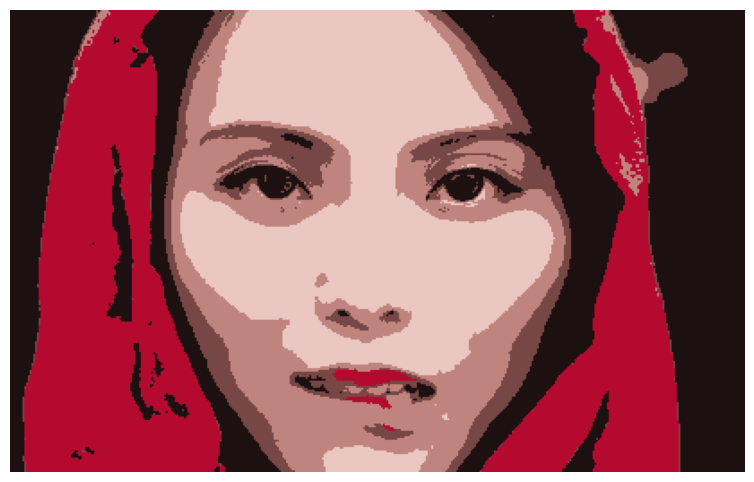

In [14]:
def main():
    img_path = input("Enter image path: ")
    
    # Read image
    img_2d = read_img(img_path)
    
    # Flatten image
    img_1d = convert_img_to_1d(img_2d)
    
    # Ask user for the number of clusters
    k_clusters = int(input("Enter the number of clusters for K-means: "))
    
    # Run K-means clustering
    centroids, labels = kmeans(img_1d, k_clusters, max_iter=400, init_centroids='random')
    
    print(f"K-means with k = {k_clusters} clusters:")
    segmented_img = generate_2d_img(img_2d.shape, centroids, labels)
    
    # Show image
    show_img(segmented_img)
    
    # Save image
    segmented_img_path = input("Enter path to save image: ")
    save_img(segmented_img, segmented_img_path)


if __name__ == "__main__":
    main()